In [79]:
import os
import pandas as pd
import json

testList = [] # list of dictionaries

# walk through the tree of files
# if the current directory includes "test" then save the config settings and the numerical results
for root, dirs, files in os.walk("./cmiModeling/_outputs/D40_SU_Testing") :
    if "test" in root:
        with open(root + '/configSettings.txt') as filename:
            test = json.load(filename)
        with open(root +'/numericalResults.txt') as file2:
            data = json.load(file2)
            data["faultSmoothing"] = test["smoothing"]["fault"]
            data["cmiSmoothing"] = test["smoothing"]["cmi"]
            data["spatiallyVariable"] = test["spatiallyVariable"]
            data["cmiDepth"] = test["cmiDepth"]
            data["testName"] = test["results"]["testName"]
            testList.append(data)


models = pd.DataFrame(testList)
models.set_index("testName")


# for file in folders:
#     if file == "test0":
#         print("found")
#     else:
#         continue

,avgCmiRake (deg),avgFaultRake (deg),cmiMaxMag (m),cmiMoment,faultMaxMag (m),faultMoment,rmse (cm),faultSmoothing,cmiSmoothing,spatiallyVariable,cmiDepth
testName,,,,,,,,,,,
test16,-36.531335,15.557403,88.960817,5.016416e+27,0.695548,7.946965e+24,1.204979,4.000000e+14,5.000000e+13,False,40
test11,-36.882096,8.100241,70.313494,3.958416e+27,2.237427,2.370797e+25,1.132814,1.000000e+14,5.000000e+13,False,40
test18,-32.683989,9.891965,49.597183,3.054305e+27,1.973307,2.056986e+25,1.504995,4.000000e+14,4.000000e+14,False,40
test20,-47.162622,19.186498,122.352771,6.894832e+27,0.437411,2.775046e+24,1.033631,1.000000e+15,1.000000e+13,False,40
test21,-36.264358,20.048227,95.004361,5.380214e+27,0.425551,3.883515e+24,1.233730,1.000000e+15,5.000000e+13,False,40
test19,-28.883687,7.305964,34.684901,2.201354e+27,2.756781,2.883353e+25,1.636675,4.000000e+14,1.000000e+15,False,40
test10,-44.273978,10.024595,106.664158,5.858842e+27,0.943086,1.101737e+25,0.969497,1.000000e+14,1.000000e+13,False,40
test17,-33.559651,12.536150,75.116900,4.348939e+27,1.031016,1.108719e+25,1.303032,4.000000e+14,1.000000e+14,False,40
test9,-11.703417,-2.004923,10.466652,6.993961e+26,6.602929,7.084337e+25,1.299737,5.000000e+13,1.000000e+15,False,40


In [98]:
f1e13_models = (models.loc[lambda df: (df["faultSmoothing"] == 1e13)]).sort_values(by="cmiSmoothing")

f5e13_models = (models.loc[lambda df: (df["faultSmoothing"] == 5e13)]).sort_values(by="cmiSmoothing")

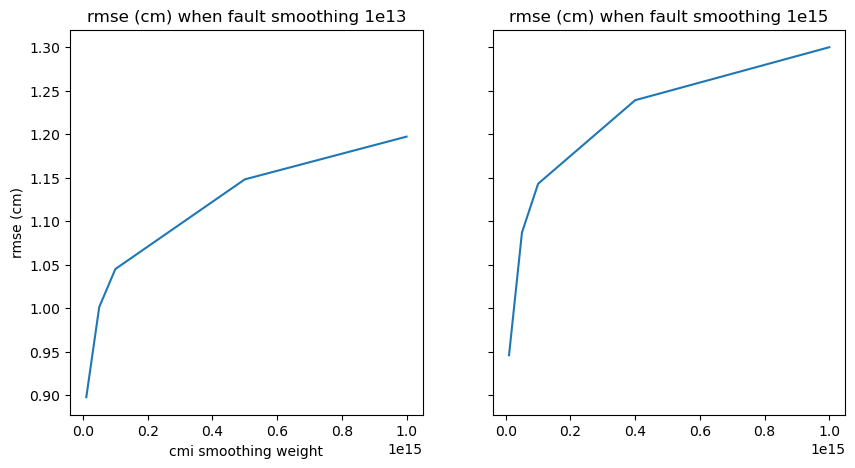

In [100]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)
ax[0].set_title("rmse (cm) when fault smoothing 1e13")
ax[0].set_ylabel("rmse (cm)")
ax[0].set_xlabel("cmi smoothing weight")
ax[0].plot(f1e13_models["cmiSmoothing"], f1e13_models["rmse (cm)"]);

ax[1].set_title("rmse (cm) when fault smoothing 1e15")
ax[1].plot(f5e13_models["cmiSmoothing"], f5e13_models["rmse (cm)"]);